In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('xG8').getOrCreate()

your 131072x1 screen size is bogus. expect trouble
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/29 04:33:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
shots_data = spark.read.csv('hdfs://localhost:9000/big-data/shots_data.csv',header=True,inferSchema=True)

In [20]:
shots_data.printSchema()

root
 |-- id: string (nullable = true)
 |-- player_id: double (nullable = true)
 |-- shot_location_x: double (nullable = true)
 |-- shot_location_y: double (nullable = true)
 |-- distance_to_goal: double (nullable = true)
 |-- shot_angle: double (nullable = true)
 |-- preferred_foot_shot: integer (nullable = true)
 |-- from_rp: integer (nullable = true)
 |-- from_fk: integer (nullable = true)
 |-- from_corner: integer (nullable = true)
 |-- header: integer (nullable = true)
 |-- corner_type: integer (nullable = true)
 |-- fk_type: integer (nullable = true)
 |-- pk_type: integer (nullable = true)
 |-- lob_technique: integer (nullable = true)
 |-- shot_first_time: integer (nullable = true)
 |-- shot_one_on_one: integer (nullable = true)
 |-- shot_follows_dribble: integer (nullable = true)
 |-- players_inside_area: integer (nullable = true)
 |-- acrobatic_shot: integer (nullable = true)
 |-- shot_statsbomb_xg: double (nullable = true)
 |-- sb_prediction: double (nullable = true)
 |-- goal

In [4]:
shots_data.count(), len(shots_data.columns)

(3755392, 23)

In [6]:
shots_data.show(5)

+------+---------+------------------+------------------+----------------+------------------+-------------------+-------+-------+-----------+------+-----------+-------+-------+-------------+---------------+---------------+--------------------+-------------------+--------------+------------------+-------------+----+
|    id|player_id|   shot_location_x|   shot_location_y|distance_to_goal|        shot_angle|preferred_foot_shot|from_rp|from_fk|from_corner|header|corner_type|fk_type|pk_type|lob_technique|shot_first_time|shot_one_on_one|shot_follows_dribble|players_inside_area|acrobatic_shot| shot_statsbomb_xg|sb_prediction|goal|
+------+---------+------------------+------------------+----------------+------------------+-------------------+-------+-------+-----------+------+-----------+-------+-------+-------------+---------------+---------------+--------------------+-------------------+--------------+------------------+-------------+----+
|155711|   4299.0|119.51999816894532|46.560000610351

In [14]:
features = shots_data.columns[4:]

In [16]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns

assembler = VectorAssembler(inputCols=features, outputCol="features")
df_vec = assembler.transform(shots_data.select(*features))
correlation_matrix = Correlation.corr(df_vec, "features").head()[0]
corr_matrix = correlation_matrix.toArray()

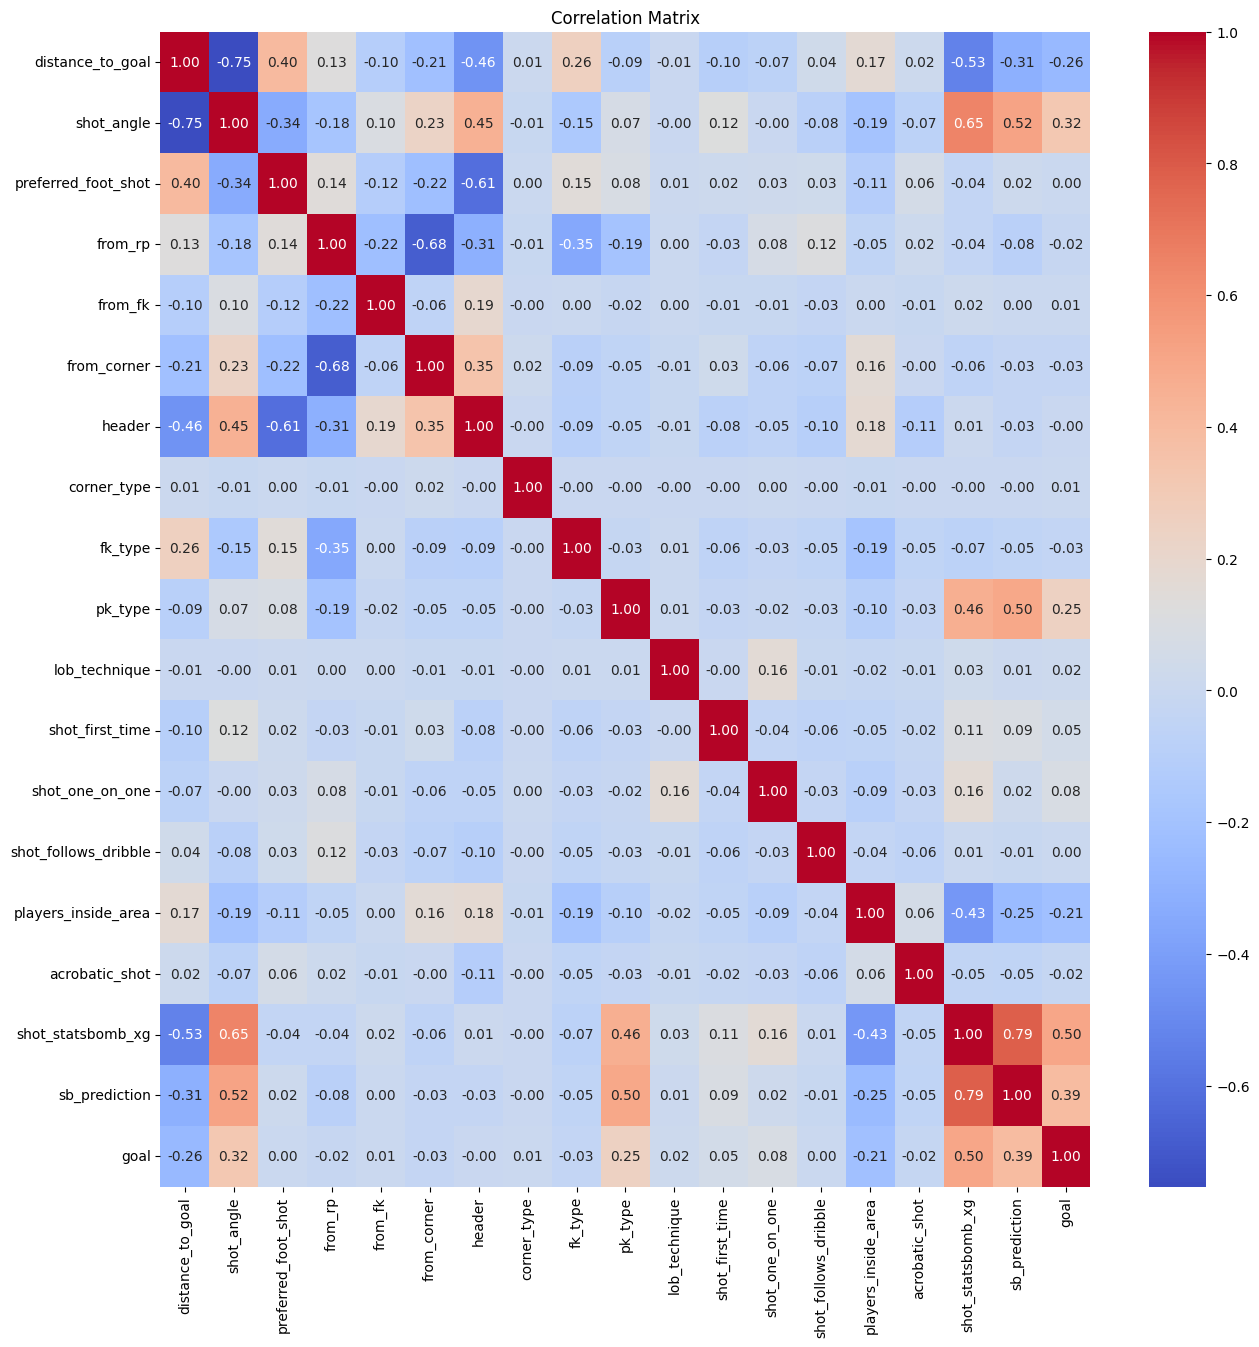

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=features, yticklabels=features)
plt.title("Correlation Matrix")
plt.show()